In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt



In [2]:
dataset = {
    'color' : ['Red', 'Blue', 'Red', 'Blue','Red', 'Blue','Blue','Red', 'Blue', 'Blue'],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [3]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [4]:
data = pd.DataFrame(dataset)

In [5]:
data

,color,target
0,Red,1
1,green,0
2,Red,1
3,Blue,0
4,Red,1
5,green,0
6,Blue,0
7,Red,1
8,Blue,0
9,green,1


In [8]:
ohe = OneHotEncoder(sparse_output=False)

In [9]:
ohe

OneHotEncoder(sparse_output=False)

In [13]:
ohe.fit_transform(data[['color']])

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [14]:
encoded_data = ohe.fit_transform(data[['color']])

In [15]:
encoded_data

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [16]:
ohe.get_feature_names_out()

array(['color_Blue', 'color_Red', 'color_green'], dtype=object)

In [17]:
tree = DecisionTreeClassifier()

In [19]:
tree.fit(encoded_data, data['target'] )

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'color_Blue <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.7, 0.6666666666666667, '  False')]

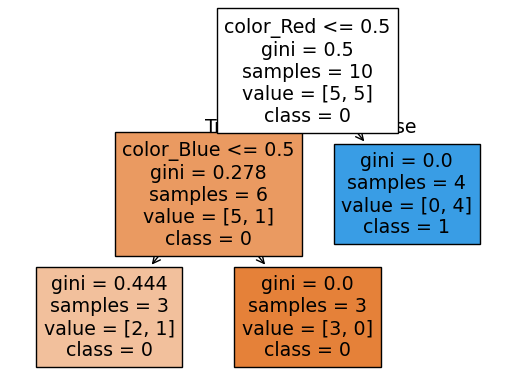

In [21]:
plot_tree(tree, feature_names = ohe.get_feature_names_out(),class_names = ['0','1'], filled = True)

In [22]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'Size' : ['Small', 'Large', 'Medium','Small', 'Large', 'Medium','Small', 'Large', 'Medium','Large' ],
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [26]:
data = pd.DataFrame(dataset)

In [28]:
ohe = OneHotEncoder(sparse_output= False)
encoded_data = ohe.fit_transform(data[['color','Size']])

In [29]:
column_name = ohe.get_feature_names_out()

In [30]:
encoded_df = pd.DataFrame(encoded_data, columns=column_name)

In [31]:
final_data = pd.concat([encoded_df, data[['Weight','target']]], axis = 1)

In [32]:
final_data

,color_Blue,color_Red,color_green,Size_Large,Size_Medium,Size_Small,Weight,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.0,0.0,1.0,1.0,0.0,0.0,2,0
2,0.0,1.0,0.0,0.0,1.0,0.0,4,1
3,1.0,0.0,0.0,0.0,0.0,1.0,1,0
4,0.0,1.0,0.0,1.0,0.0,0.0,3,1
5,0.0,0.0,1.0,0.0,1.0,0.0,2,0
6,1.0,0.0,0.0,0.0,0.0,1.0,4,0
7,0.0,1.0,0.0,1.0,0.0,0.0,5,1
8,1.0,0.0,0.0,0.0,1.0,0.0,3,0
9,0.0,0.0,1.0,1.0,0.0,0.0,2,1


In [33]:
X = final_data.drop(columns = 'target')

In [34]:
y = final_data['target']

In [35]:
tree = DecisionTreeClassifier()

In [36]:
tree.fit(X,y)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'Size_Large <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.7, 0.6666666666666667, '  False')]

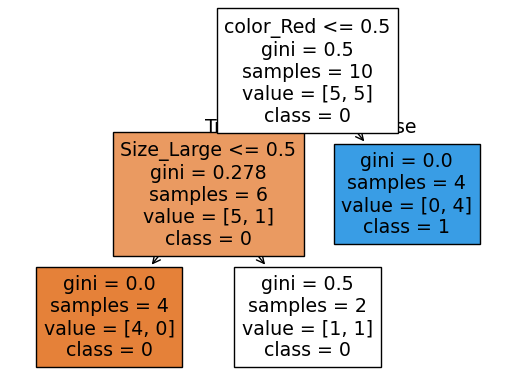

In [38]:
plot_tree(tree, feature_names = X.columns.values,class_names = ['0','1'], filled = True)

In [40]:
tree.feature_importances_

array([0.        , 0.83333333, 0.        , 0.16666667, 0.        ,
       0.        , 0.        ])

In [41]:
tree.feature_names_in_

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small', 'Weight'], dtype=object)

<Axes: >

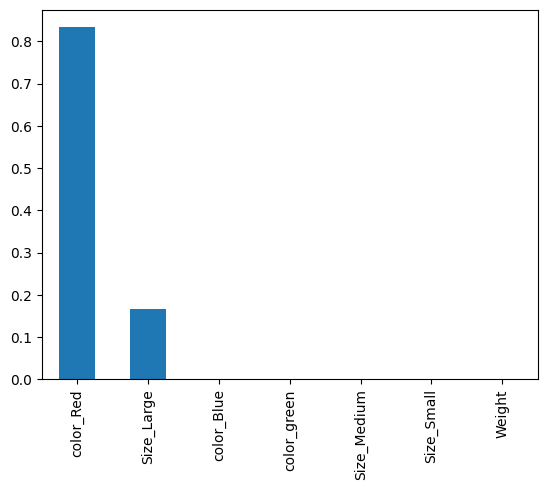

In [42]:
pd.Series(tree.feature_importances_, index=tree.feature_names_in_).sort_values(ascending=False).plot(kind = 'bar')

In [44]:
dataset = {
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

data = pd.DataFrame(dataset)

In [46]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [47]:
tree.fit(data[['Weight']], data['target'])

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

[Text(0.6666666666666666, 0.875, 'Weight <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.5, 0.625, 'Weight <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Weight <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.75, 0.75, '  False')]

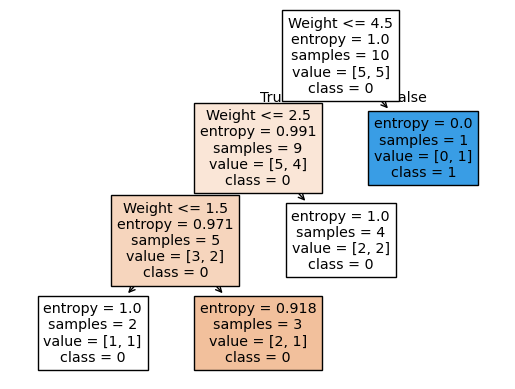

In [48]:
plot_tree(tree, feature_names = ['Weight'],class_names = ['0','1'], filled = True)

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [57]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [58]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
iris_df['target'] = iris.target

In [61]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [71]:
X = iris_df.drop(columns='target')

In [63]:
y = iris_df['target']

In [67]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [73]:
X.shape,y.shape

((150, 4), (150,))

In [99]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=.33,random_state=42)

In [100]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((100, 4), (50, 4), (100,), (50,))

## Criterion

In [131]:
def fit_result(param_name,param):
    params = {param_name:param}
    tree = DecisionTreeClassifier(**params)
    tree.fit(train_X,train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y,train_pred))
    print("Test Accuracy : ",accuracy_score(test_y,test_pred))
    return tree

In [102]:
fit_result(param_name='criterion',param='entropy')

Train Accuracy :  1.0
Test Accuracy :  0.98


In [103]:
fit_result(param_name='criterion',param='gini')

Train Accuracy :  1.0
Test Accuracy :  0.98


## max_depth

In [104]:
fit_result(param_name='max_depth',param=None)

Train Accuracy :  1.0
Test Accuracy :  0.98


In [105]:
fit_result(param_name='max_depth',param=1)

Train Accuracy :  0.66
Test Accuracy :  0.68


In [106]:
fit_result(param_name='max_depth',param=2)

Train Accuracy :  0.95
Test Accuracy :  0.98


In [107]:
fit_result(param_name='max_depth',param=3)

Train Accuracy :  0.97
Test Accuracy :  0.98


In [112]:
fit_result(param_name='max_depth',param=4)

Train Accuracy :  0.98
Test Accuracy :  0.98


In [109]:
fit_result(param_name='max_depth',param=5)

Train Accuracy :  0.99
Test Accuracy :  0.98


In [110]:
fit_result(param_name='max_depth',param=20)

Train Accuracy :  1.0
Test Accuracy :  0.98


### Summary: Start with no depth limit (None) and check the performance. If overfitting is observed, gradully reduce the depth

## min_samples_split

In [114]:
fit_result(param_name='min_samples_split',param=2)

Train Accuracy :  1.0
Test Accuracy :  0.98


In [115]:
fit_result(param_name='min_samples_split',param=3)

Train Accuracy :  0.98
Test Accuracy :  0.98


In [116]:
fit_result(param_name='min_samples_split',param=4)

Train Accuracy :  0.97
Test Accuracy :  0.98


In [117]:
fit_result(param_name='min_samples_split',param=5)

Train Accuracy :  0.97
Test Accuracy :  0.98


In [118]:
fit_result(param_name='min_samples_split',param=20)

Train Accuracy :  0.97
Test Accuracy :  0.98


In [120]:
train_X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [121]:
train_X.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

[Text(0.6666666666666666, 0.875, 'sepal length (cm) <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.625, 'sepal length (cm) <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'sepal length (cm) <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6666666666666666, 0.375, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.75, '  False')]

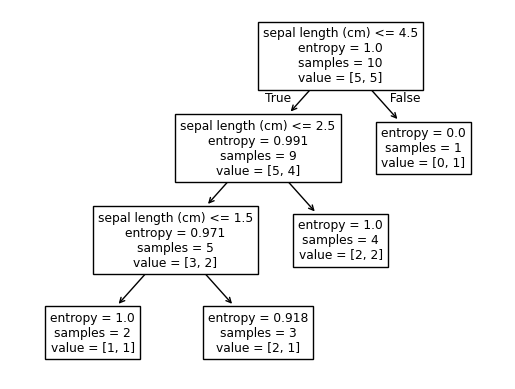

In [123]:
plot_tree(tree,feature_names=train_X.columns.values)

[Text(0.6666666666666666, 0.875, 'sepal length (cm) <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.5, 0.625, 'sepal length (cm) <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'sepal length (cm) <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.75, 0.75, '  False')]

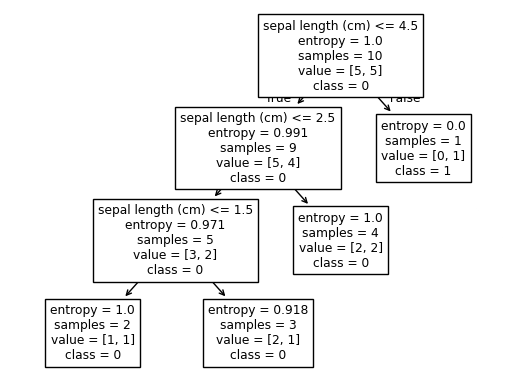

In [126]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'])

[Text(0.6666666666666666, 0.875, 'sepal length (cm) <= 4.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.5, 0.625, 'sepal length (cm) <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'sepal length (cm) <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.75, 0.75, '  False')]

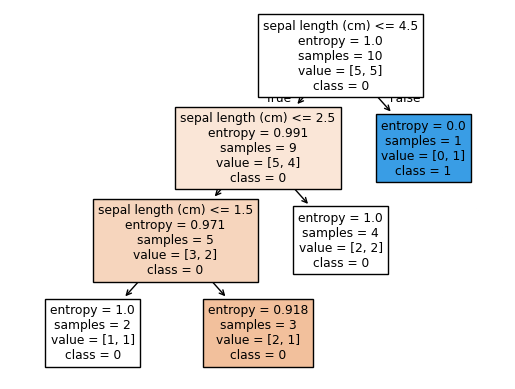

In [130]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'],filled=True)

In [132]:
tree = fit_result('min_samples_leaf', 2)

Train Accuracy :  0.97
Test Accuracy :  0.98


[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = 1'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = 0'),
 Text(0.45, 0.8333333333333333, 'True  '),
 Text(0.6, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = 1'),
 Text(0.55, 0.8333333333333333, '  False'),
 Text(0.4, 0.5833333333333334, 'petal length (cm) <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = 1'),
 Text(0.3, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = 1'),
 Text(0.2, 0.25, 'petal length (cm) <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = 1'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = 1'),
 Text(0.3, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0.4, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0

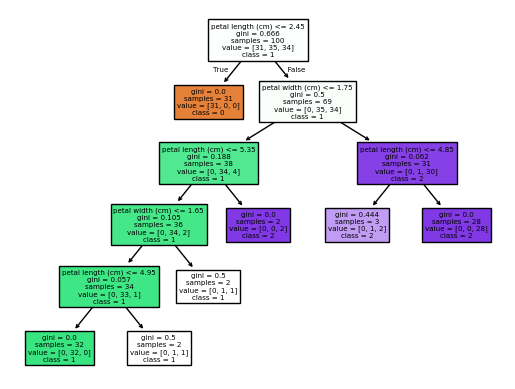

In [133]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'],filled=True)

In [134]:
fit_result('min_samples_leaf', 10)

Train Accuracy :  0.95
Test Accuracy :  0.98


DecisionTreeClassifier(min_samples_leaf=10)

In [145]:
def fit_result(**params):
    # params = {param_name:param}
    tree = DecisionTreeClassifier(**params)
    tree.fit(train_X,train_y)
    train_pred = tree.predict(train_X)
    test_pred = tree.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y,train_pred))
    print("Test Accuracy : ",accuracy_score(test_y,test_pred))
    return tree

In [147]:
fit_result(min_samples_leaf=10,criterion='entropy')

Train Accuracy :  0.95
Test Accuracy :  0.98


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

In [149]:
tree = fit_result(max_features=None)

Train Accuracy :  1.0
Test Accuracy :  0.98


[Text(0.5416666666666666, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = 1'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = 0'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = 1'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'petal length (cm) <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = 1'),
 Text(0.3333333333333333, 0.5, 'sepal length (cm) <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = 1'),
 Text(0.16666666666666666, 0.35714285714285715, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\

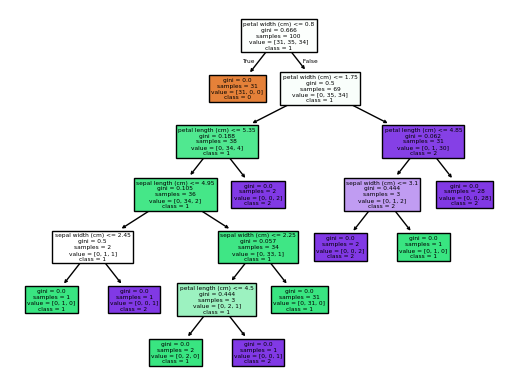

In [151]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'],filled=True)

In [ ]:
DecisionTreeClassifier()

In [153]:
tree = fit_result(max_features='sqrt')

Train Accuracy :  1.0
Test Accuracy :  0.94


[Text(0.5357142857142857, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = 1'),
 Text(0.4642857142857143, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = 0'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.6071428571428571, 0.7857142857142857, 'sepal length (cm) <= 6.15\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = 1'),
 Text(0.5714285714285714, 0.8571428571428572, '  False'),
 Text(0.35714285714285715, 0.6428571428571429, 'petal length (cm) <= 4.75\ngini = 0.382\nsamples = 35\nvalue = [0, 26, 9]\nclass = 1'),
 Text(0.21428571428571427, 0.5, 'sepal length (cm) <= 4.95\ngini = 0.077\nsamples = 25\nvalue = [0, 24, 1]\nclass = 1'),
 Text(0.14285714285714285, 0.35714285714285715, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0.07142857142857142, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.21428571428571427, 0.

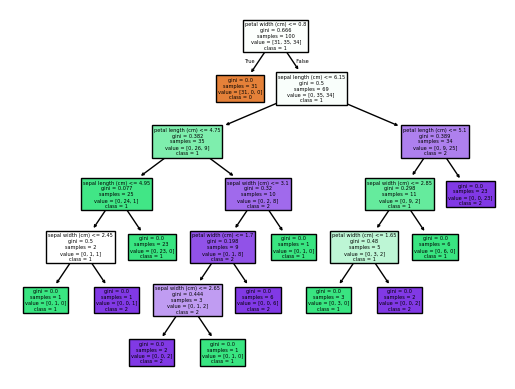

In [154]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'],filled=True)

In [156]:
tree = fit_result(max_features='log2')

Train Accuracy :  1.0
Test Accuracy :  0.96


[Text(0.5972222222222222, 0.9375, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = 1'),
 Text(0.5416666666666666, 0.8125, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = 0'),
 Text(0.5694444444444444, 0.875, 'True  '),
 Text(0.6527777777777778, 0.8125, 'sepal length (cm) <= 6.15\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = 1'),
 Text(0.625, 0.875, '  False'),
 Text(0.4166666666666667, 0.6875, 'sepal length (cm) <= 5.75\ngini = 0.382\nsamples = 35\nvalue = [0, 26, 9]\nclass = 1'),
 Text(0.2222222222222222, 0.5625, 'sepal length (cm) <= 4.95\ngini = 0.255\nsamples = 20\nvalue = [0, 17, 3]\nclass = 1'),
 Text(0.1111111111111111, 0.4375, 'petal width (cm) <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = 1'),
 Text(0.05555555555555555, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 2'),
 Text(0.3333333333333333, 0.4375, 

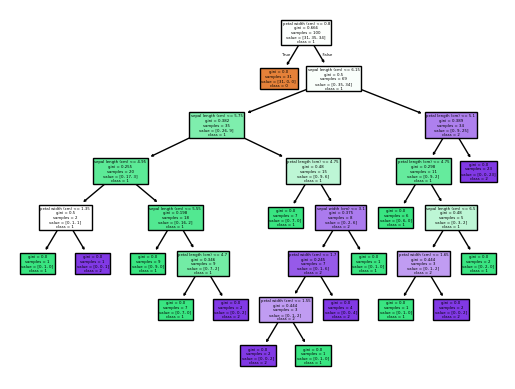

In [157]:
plot_tree(tree,feature_names=train_X.columns.values,class_names=['0','1','2'],filled=True)

In [163]:
for i in list(range(0,4))+[None]:
    print(i)

0
1
2
3
None


In [165]:
param_grid={
    'criterion':['entropy','gini'],
    'max_depth' : list(range(2,10))+[None],
    'min_samples_split': range(0,20),
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ['auto','sqrt', 'log2'] 
}

In [168]:
tree=DecisionTreeClassifier()
tree.fit(train_X,train_y)

DecisionTreeClassifier()

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
GridSearchCV()

In [170]:
grid_search = GridSearchCV(tree,param_grid=param_grid,scoring='accuracy')

In [171]:
%%time
grid_search.fit(train_X, train_y)

CPU times: user 22.2 s, sys: 385 ms, total: 22.5 s
Wall time: 23.8 s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(0, 20)},
             scoring='accuracy')

In [172]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=6)

In [173]:
train_pred_gcv=grid_search.best_estimator_.predict(train_X)
test_pred_gcv=grid_search.best_estimator_.predict(test_X)

In [174]:
accuracy_score(train_y, train_pred_gcv), accuracy_score(test_y, test_pred_gcv)

(0.97, 0.98)

In [175]:
randomized_search = RandomizedSearchCV(tree, cv = 2, param_distributions=param_grid,scoring = 'accuracy', random_state= 32 )

In [177]:
%%time
randomized_search.fit(train_X, train_y)

CPU times: user 37.2 ms, sys: 22.4 ms, total: 59.6 ms
Wall time: 107 ms


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': range(0, 20)},
                   random_state=32, scoring='accuracy')

In [178]:
randomized_search.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=6)

In [179]:
train_pred_rcv=randomized_search.best_estimator_.predict(train_X)
test_pred_rcv=randomized_search.best_estimator_.predict(test_X)

In [180]:
accuracy_score(train_y, train_pred_rcv), accuracy_score(test_y, test_pred_rcv)

(0.97, 1.0)